### Preprocessing and Spectrogram Generation 

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image
import os

# All the audio files have a sample rate of 48000
sr = 48000

# librosa spectrogram production parameters
n_fft = 2048
hop_length = 512

# All the audio clips are under 8 seconds
length = 8*sr

# ResNeSt50 input layer is 224 x 224 x 3
dimensions = (224,224)

data_path = '../Data/'

#Determines the number of images to generate
num_of_images = 20

In [2]:
def generate_image(data,image_title,path):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(data, x_axis='time', y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title=image_title)
    fig.savefig(path)
    plt.close(fig)

In [3]:
#Currently using a melspectrogram, Chromagram SFTF, and SFTF
#Possible other ideas: Chirplet
def generate_spectrograms(df,file_name):
    df['mspec'] = np.nan
    df['mspec'] = object
  
    for idx,row in df.iterrows():
        if idx%100 == 0:
            print("Processed ", idx, "/", len(df))
        
        wav, sample_rate = librosa.load(data_path + 'train/' + row['recording_id'] + '.flac', sr=None)
    
        # for splicing and centering waveform along time dimensions
        m = (int)((row['t_min'] + row['t_max'])*sr/2)
        l = (int)(m-(length/2))
        r = (int)(m+(length/2)) 
        if l < 0:
            r += l
            l = 0
        elif r > len(wav):
            l -= r-len(wav)
            r = len(wav)
        
        # for splicing according to the minimum and maximum frequencies provided
        fmin = 0
        fmax = 14000

#         if fmin > row['f_min']:
#             fmin = row['f_min']
#         if fmax < row['f_max']:
#             fmax = row['f_max']
#         # safety margin for frequency mins and maxes
#         fmin = int(fmin * 0.9)
#         fmax = int(fmax * 1.1)
        
        # Melspectrogram creation
        mspec = librosa.feature.melspectrogram(y=wav[l:r], fmin=fmin, fmax=fmax, sr=48000, \
                                                                   power=2.0, n_fft=2048, hop_length=512)
        mspec = librosa.decompose.nn_filter(mspec)
        mspec = librosa.power_to_db(mspec)
        
        # Add noise to Melspectrogram
#         mspec_noise = mspec.copy()
#         noise_amp = 0.005*np.random.uniform()*np.amax(mspec_noise)
#         mspec_noise = mspec_noise.astype('float64') + noise_amp * np.random.normal(size=mspec_noise.shape)
        
        # Resize to input dimension of ResNeSt50
#         mspec = resize(mspec, dimensions)
        
        if idx < 10: 
            print(mspec)
            fig, ax = plt.subplots()
            img = librosa.display.specshow(mspec, sr=sr)
            
        plt.show()

        plt.figure()
        librosa.display.specshow(mspec)
        plt.savefig('/tmp/librosa_images/' + str(idx) + "_melspec.png")
        plt.close()
        
#         image_mspec = Image.open('/tmp/librosa_images/' + str(idx) + "_melspec.png").convert('RGB')
#         mspec = np.array(image_mspec)
        
#         if idx < 1: 
#             print(image_mspec.mode)
#             print(mspec)
#             print(mspec.shape)
            
#             image_mspec.show()
#             tmp_image = Image.fromarray(mspec)
        
#             tmp_image.show()
#             # wrapping mspec 3-D array with a list for later retrieval
#         df.at[idx, 'mspec'] = mspec
        
#     df['mspec'] = df['mspec'].apply(lambda x: [np.array(x)])
#     df.to_csv(data_path+'csv/'+file_name)

In [4]:
train_tp_df = pd.read_csv(data_path + 'train_tp.csv')
train_fp_df = pd.read_csv(data_path + 'train_fp.csv')
train_df = pd.concat([train_tp_df, train_fp_df], axis=0, ignore_index=True)
print(train_df.shape)
train_df.head()

(8997, 7)


,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


Processed  0 / 8997
[[-26.641727 -26.578354 -26.542547 ... -25.472319 -25.848276 -25.530642]
 [-24.341375 -24.808968 -24.690878 ... -22.435028 -22.574186 -22.690096]
 [-19.454361 -19.680635 -19.980225 ... -16.894642 -16.78608  -16.912487]
 ...
 [-34.00475  -34.65261  -34.86652  ... -34.47784  -34.414124 -34.67115 ]
 [-32.190105 -32.470695 -32.625996 ... -30.768925 -30.425846 -31.484394]
 [-32.188934 -32.424065 -32.47712  ... -29.767696 -29.396076 -30.998898]]


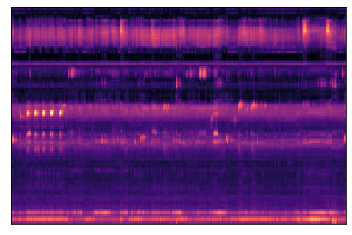

[[-6.0974908e+00 -5.1505833e+00 -4.2688127e+00 ... -1.8586422e+01
  -1.8278599e+01 -1.9753723e+01]
 [-5.3922119e+00 -4.0560417e+00 -2.1641204e+00 ... -1.8147739e+01
  -1.6767670e+01 -1.8683311e+01]
 [-4.2656679e+00 -1.2300643e+00  6.3415989e-04 ... -1.8903728e+01
  -1.6079765e+01 -1.8452824e+01]
 ...
 [-4.0054020e+01 -4.0191025e+01 -3.9956406e+01 ... -4.1131001e+01
  -4.1438393e+01 -4.1194363e+01]
 [-4.0398998e+01 -4.0176384e+01 -4.0199604e+01 ... -4.1356064e+01
  -4.1442711e+01 -4.1551331e+01]
 [-3.9811611e+01 -3.9805302e+01 -3.9464828e+01 ... -4.0528355e+01
  -4.0600796e+01 -4.0626678e+01]]


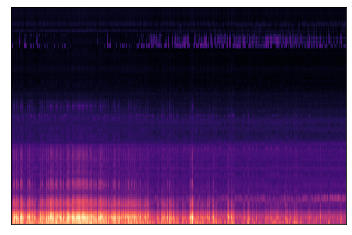

[[ -8.100073   -7.428596   -7.6244125 ...  -7.569163   -7.5974107
  -12.01439  ]
 [ -5.012384   -3.9614367  -4.1792793 ...  -4.1476746  -4.384157
   -9.318529 ]
 [ -5.6562824  -4.9322205  -5.2201366 ...  -4.397053   -4.4980335
   -9.98616  ]
 ...
 [-35.57811   -35.587242  -35.698322  ... -35.642933  -35.55671
  -35.52926  ]
 [-35.570274  -35.454063  -35.59178   ... -35.350548  -35.56147
  -34.841267 ]
 [-35.48884   -35.59815   -35.639908  ... -35.528355  -35.85071
  -35.305813 ]]


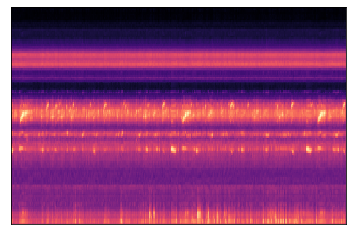

[[-17.808277 -16.029966 -16.665253 ... -22.143347 -21.672337 -23.962654]
 [-16.057774 -14.734899 -16.082945 ... -19.317009 -19.725569 -22.690979]
 [-17.863216 -18.313131 -20.493677 ... -19.516962 -21.942299 -23.963146]
 ...
 [-38.396107 -38.430294 -38.12432  ... -38.1857   -38.65745  -38.08179 ]
 [-37.827057 -37.856224 -37.2881   ... -37.453686 -37.931572 -36.60496 ]
 [-37.061985 -37.16446  -36.49562  ... -37.182034 -37.40116  -36.127068]]


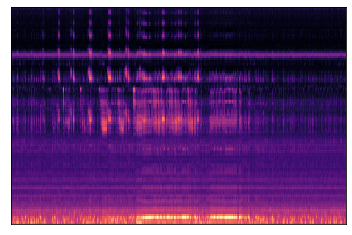

[[-19.096245  -14.219054   -9.0708065 ... -19.704054  -19.447964
  -20.860033 ]
 [-15.42177   -14.412071   -9.854641  ... -17.363207  -16.000706
  -16.884632 ]
 [-15.297987  -16.652815  -12.594746  ... -15.53095   -13.503035
  -16.21385  ]
 ...
 [-36.01918   -35.27801   -35.088478  ... -35.876507  -35.61178
  -36.207077 ]
 [-35.65521   -35.385536  -34.824528  ... -35.4125    -35.353394
  -35.798496 ]
 [-35.055523  -35.10182   -34.86736   ... -34.96736   -34.930508
  -35.156315 ]]


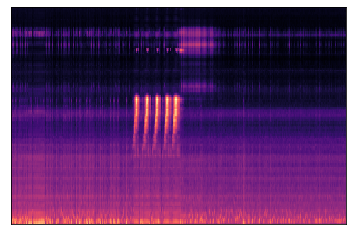

[[-16.642488 -16.167633 -16.070614 ... -17.858412 -17.713654 -17.665916]
 [-17.856352 -17.493807 -18.28122  ... -19.767231 -19.874416 -19.999388]
 [-18.838636 -18.271257 -19.021223 ... -20.376179 -20.199831 -20.338709]
 ...
 [-35.10775  -35.818657 -35.055004 ... -34.193577 -34.123226 -34.84736 ]
 [-32.09831  -34.2595   -32.503086 ... -31.340668 -31.198063 -32.356316]
 [-30.107754 -32.253067 -30.622446 ... -29.36328  -29.08279  -30.412958]]


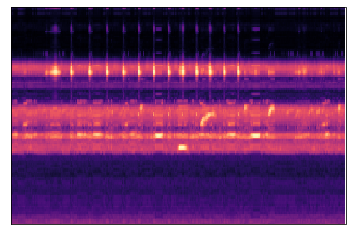

[[-26.588055 -26.995714 -25.38961  ... -24.805534 -23.669127 -23.78384 ]
 [-25.074848 -25.109676 -23.525452 ... -22.692764 -21.133247 -21.551287]
 [-23.756435 -24.6578   -22.703493 ... -21.514902 -19.860271 -20.06528 ]
 ...
 [-38.152977 -34.87758  -35.986958 ... -38.73954  -39.268333 -39.08082 ]
 [-36.798016 -33.62565  -34.89674  ... -37.88034  -38.51908  -38.47523 ]
 [-37.723824 -35.448578 -36.201534 ... -38.10815  -38.196896 -38.129387]]


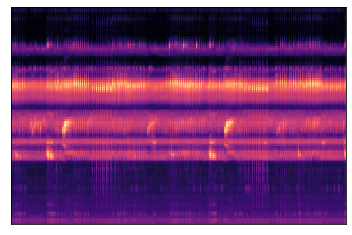

[[ -8.091682   -8.084049   -7.025236  ...  -7.033287   -7.390724
   -7.3910117]
 [ -5.7525277  -5.8363457  -4.992367  ...  -3.997979   -3.801547
   -3.712834 ]
 [ -4.9839735  -5.025646   -5.2770524 ...  -3.7266116  -3.5871074
   -3.5673194]
 ...
 [-33.75806   -33.783245  -33.82684   ... -35.336487  -35.589203
  -35.60197  ]
 [-35.91685   -35.9465    -36.000816  ... -35.519485  -35.598797
  -35.54753  ]
 [-35.631226  -35.593395  -35.713203  ... -35.07324   -34.994576
  -34.94148  ]]


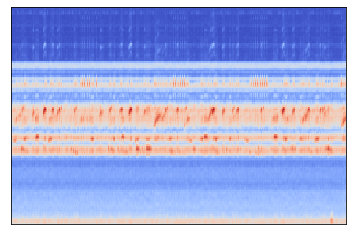

[[-20.102562 -19.401672 -17.967258 ... -22.341278 -22.453402 -22.647594]
 [-16.071632 -15.976943 -15.515907 ... -20.442465 -20.12573  -19.846876]
 [-16.04101  -16.545107 -17.507107 ... -22.105927 -21.288242 -21.32949 ]
 ...
 [-35.538834 -35.478542 -34.046913 ... -36.725334 -36.73871  -36.576813]
 [-34.18238  -34.44698  -32.480797 ... -35.586338 -35.481945 -35.030632]
 [-35.150208 -35.527954 -34.381786 ... -35.532806 -35.43486  -35.170437]]


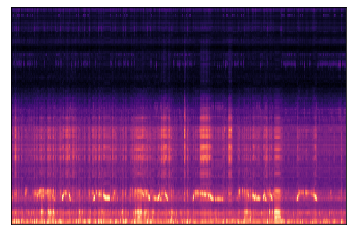

[[-17.18856   -17.434795  -17.181501  ... -16.247532  -15.85829
  -17.306025 ]
 [-14.632277  -14.577394  -14.370811  ... -12.1160555 -11.517154
  -13.532538 ]
 [-15.90637   -15.091657  -15.006217  ... -12.614277  -12.2218895
  -14.63188  ]
 ...
 [-19.296953  -19.652294  -20.178804  ... -19.896725  -19.837051
  -18.755405 ]
 [-19.414772  -19.170225  -19.94937   ... -19.427473  -19.26765
  -18.934553 ]
 [-19.569904  -19.365038  -19.715937  ... -18.797009  -18.57705
  -18.993008 ]]


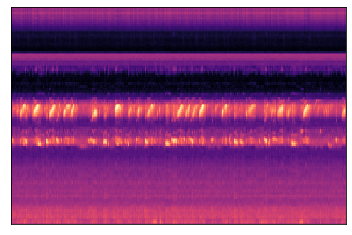

Processed  100 / 8997
Processed  200 / 8997
Processed  300 / 8997
Processed  400 / 8997
Processed  500 / 8997
Processed  600 / 8997
Processed  700 / 8997
Processed  800 / 8997
Processed  900 / 8997
Processed  1000 / 8997
Processed  1100 / 8997
Processed  1200 / 8997
Processed  1300 / 8997
Processed  1400 / 8997
Processed  1500 / 8997
Processed  1600 / 8997
Processed  1700 / 8997
Processed  1800 / 8997
Processed  1900 / 8997
Processed  2000 / 8997
Processed  2100 / 8997
Processed  2200 / 8997
Processed  2300 / 8997
Processed  2400 / 8997
Processed  2500 / 8997
Processed  2600 / 8997
Processed  2700 / 8997
Processed  2800 / 8997
Processed  2900 / 8997
Processed  3000 / 8997
Processed  3100 / 8997
Processed  3200 / 8997
Processed  3300 / 8997
Processed  3400 / 8997
Processed  3500 / 8997
Processed  3600 / 8997
Processed  3700 / 8997
Processed  3800 / 8997
Processed  3900 / 8997
Processed  4000 / 8997
Processed  4100 / 8997
Processed  4200 / 8997
Processed  4300 / 8997
Processed  4400 / 89

In [5]:
generate_spectrograms(train_df,'train_data.csv')

In [6]:
def create_test_mel_spectogram(file):
    fft = 2048
    hop = 512 
    sr = 48000
        
    wav, sr = librosa.load(data_path + 'test/{}'.format(file))
    segments = len(wav) / length
    segments = int(np.ceil(segments))
    
    # splicing of test waveforms both to match input dimensions of model
    # and to generate melspectrograms that match time dimensions of training data
    for i in range(segments):
        if (i + 1) * length > len(wav):
            slice = wav[len(wav) - length:len(wav)]
        else:
            slice = wav[i * length:(i + 1) * length]
        mspec = librosa.feature.melspectrogram(y=slice, sr=48000, n_fft=2048, fmax=14000, hop_length=512, power=2.0)
        mspec = librosa.decompose.nn_filter(mspec)
        mspec = librosa.power_to_db(mspec)
        fig = plt.figure()
        librosa.display.specshow(mspec)
        plt.savefig('/tmp/librosa_images/test/' + file[:-4] + '_' + str(i) + "_melspec.png")
        plt.close(fig)

In [7]:
test_files = os.listdir(data_path + 'test/') 
print(len(test_files))

for i in range(0, len(test_files)):
    create_test_mel_spectogram(test_files[i])
    if i % 100 == 0 and i > 0:
        print('Generated spectrogram for ' + str(i) + ' of ' + str(len(test_files) + 1) + ' files')

1992
Generated spectrogram for 100 of 1993 files
Generated spectrogram for 200 of 1993 files
Generated spectrogram for 300 of 1993 files
Generated spectrogram for 400 of 1993 files
Generated spectrogram for 500 of 1993 files
Generated spectrogram for 600 of 1993 files
Generated spectrogram for 700 of 1993 files
Generated spectrogram for 800 of 1993 files
Generated spectrogram for 900 of 1993 files
Generated spectrogram for 1000 of 1993 files
Generated spectrogram for 1100 of 1993 files
Generated spectrogram for 1200 of 1993 files
Generated spectrogram for 1300 of 1993 files
Generated spectrogram for 1400 of 1993 files
Generated spectrogram for 1500 of 1993 files
Generated spectrogram for 1600 of 1993 files
Generated spectrogram for 1700 of 1993 files
Generated spectrogram for 1800 of 1993 files
Generated spectrogram for 1900 of 1993 files
